## Kütüphaneleri Yükle

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Veriyi Yükle

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PhonePricePrediction/Mobile-Price-Prediction-cleaned_data.csv')

In [6]:
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


## Veri ön işleme ve EDA(Keşifsel Veri Analizi)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB


In [8]:
## eksik veri var mı?
df.isnull().sum()

,0
Ratings,0
RAM,0
ROM,0
Mobile_Size,0
Primary_Cam,0
Selfi_Cam,0
Battery_Power,0
Price,0


In [9]:
df['RAM'].value_counts()

,count
RAM,
6.0,421
8.0,153
4.0,113
3.0,39
12.0,27
2.0,21
1.0,20
10.0,7
5.0,4


In [13]:
## ram'i en büyük olan telefonların fiyatları
df[df['RAM'] == df['RAM'].max()]['Price']

,Price
25,1690
35,1579
55,121300
63,56999
88,1799
158,799
185,84900
212,899
304,35999
356,44990


In [14]:
## ortalama telefon fiyatı
df['Price'].mean()

14269.167286245352

## Aykırı değerleri(outliers) bulma

In [180]:
df_kor = df[['Ratings','RAM' , 'ROM' , 'Mobile_Size',  'Primary_Cam' , 'Selfi_Cam' , 'Battery_Power' , 'Price' ]]
outliers = df_kor.quantile(q=.99)
outliers

,0.99
Ratings,4.7
RAM,12.0
ROM,256.0
Mobile_Size,7.0
Primary_Cam,64.0
Selfi_Cam,22.0
Battery_Power,5000.0
Price,117100.0


In [181]:
df_non_outliers = df[df['Ratings']< outliers['Ratings']]
df_non_outliers['Ratings'].max()

4.6

In [182]:
df_non_outliers = df[df['RAM'] < outliers['RAM']]
df_non_outliers['RAM'].min()

0.0

In [183]:
## 0.0 ram istediğimiz bir durum değil
df_non_outliers['RAM'] = df_non_outliers['RAM'].replace({
    0.0 : None
})

In [184]:
df_non_outliers['RAM'].min()

1.0

In [185]:
df_non_outliers = df[df['ROM'] < outliers['ROM']]
df_non_outliers['ROM'].min()

2.0

In [186]:
df_non_outliers = df[df['Mobile_Size'] < outliers['Mobile_Size']]
df_non_outliers['Mobile_Size'].min()

2.0

In [187]:
df_non_outliers = df[df['Primary_Cam'] < outliers['Primary_Cam']]
df_non_outliers['Primary_Cam'].min()

5

In [188]:
df_non_outliers = df[df['Selfi_Cam'] < outliers['Selfi_Cam']]
df_non_outliers['Selfi_Cam'].min()

0.0

In [189]:
## 0.0 değeri istediğimiz bir değil
df_non_outliers['Selfi_Cam'] = df_non_outliers['Selfi_Cam'].replace({
    0.0 : None
})

In [190]:
df_non_outliers['Selfi_Cam'].min()

1.0

In [191]:
df_non_outliers = df[df['Battery_Power'] < outliers['Battery_Power']]
df_non_outliers['Battery_Power'].min()

1020

In [192]:
df_non_outliers = df[df['Price'] < outliers['Price']]
df_non_outliers['Price'].max()

112450

In [194]:
df_non_outliers

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...
802,3.8,6.0,32.0,4.54,48,12.0,2800,1299
803,4.1,8.0,64.0,4.54,64,8.0,2500,1390
804,4.4,3.0,32.0,6.20,48,1.0,3800,9790
805,3.7,10.0,32.0,4.50,64,8.0,3500,799


In [195]:
df_non_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        793 non-null    float64
 1   RAM            793 non-null    float64
 2   ROM            793 non-null    float64
 3   Mobile_Size    793 non-null    float64
 4   Primary_Cam    793 non-null    int64  
 5   Selfi_Cam      793 non-null    float64
 6   Battery_Power  793 non-null    int64  
 7   Price          793 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 55.8 KB


In [196]:
df_non_outliers.describe()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,4.102648,5.897856,63.993695,5.611567,48.031526,8.827238,3271.046658,12251.598991
std,0.363075,2.037132,53.818121,3.991380,11.131571,4.560941,941.173095,17464.611088
min,2.800000,0.000000,2.000000,2.000000,5.000000,0.000000,1020.000000,479.000000
25%,3.800000,5.000000,32.000000,4.500000,48.000000,8.000000,3000.000000,980.000000
50%,4.100000,6.000000,32.000000,4.700000,48.000000,8.000000,3000.000000,1695.000000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,12.000000,3800.000000,18499.000000
max,4.800000,12.000000,256.000000,44.000000,64.000000,23.000000,6000.000000,112450.000000


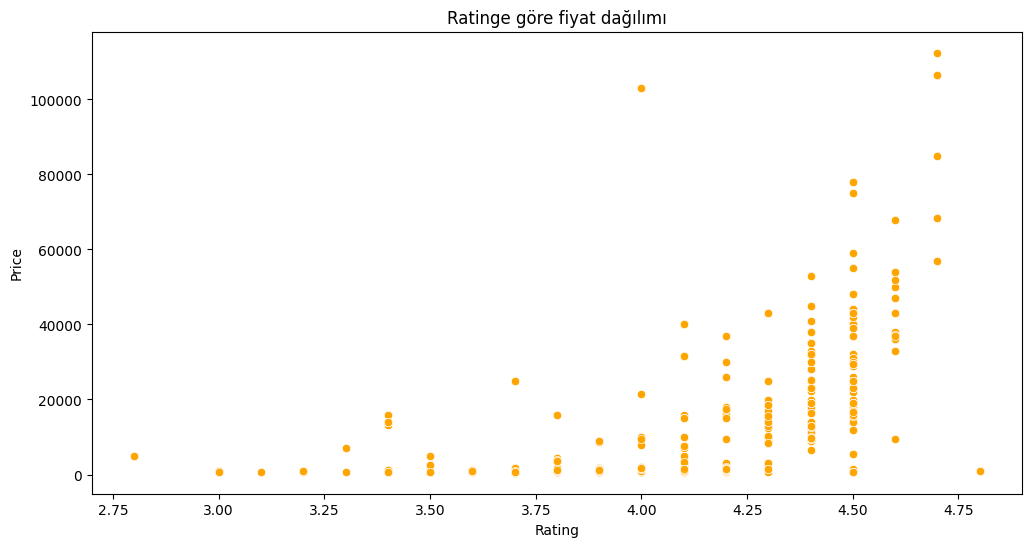

In [241]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = df_non_outliers , x= 'Ratings' , y = 'Price' , color='orange' )
plt.title('Ratinge göre fiyat dağılımı')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

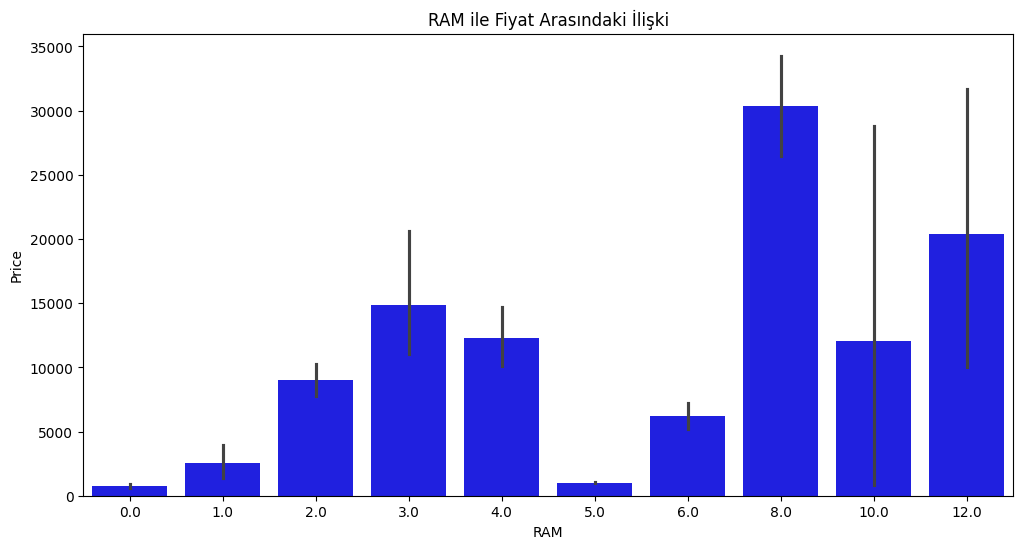

In [242]:
plt.figure(figsize=(12,6))
sns.barplot(data = df_non_outliers , x='RAM' , y='Price' , color = 'blue')
plt.title('RAM ile Fiyat Arasındaki İlişki')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.show()

## Korelasyon

In [197]:
df_non_outliers.corr()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
Ratings,1.000000,0.090672,0.427516,0.077309,-0.080778,-0.101742,0.447378,0.596096
RAM,0.090672,1.000000,0.327068,0.006413,0.204098,0.185497,0.023513,0.265403
ROM,0.427516,0.327068,1.000000,0.106616,-0.061835,-0.046413,0.412505,0.589296
Mobile_Size,0.077309,0.006413,0.106616,1.000000,-0.052041,-0.021868,0.131135,0.098450
Primary_Cam,-0.080778,0.204098,-0.061835,-0.052041,1.000000,0.137038,-0.051850,-0.178378
Selfi_Cam,-0.101742,0.185497,-0.046413,-0.021868,0.137038,1.000000,-0.098087,-0.035089
Battery_Power,0.447378,0.023513,0.412505,0.131135,-0.051850,-0.098087,1.000000,0.436069
Price,0.596096,0.265403,0.589296,0.098450,-0.178378,-0.035089,0.436069,1.000000


<Axes: >

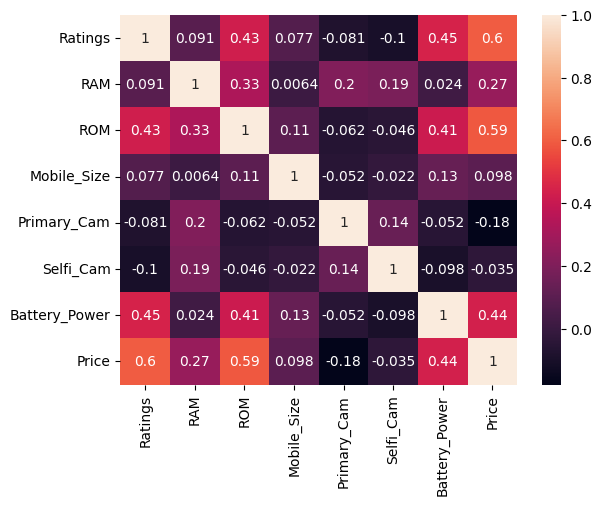

In [198]:
## aykırı olmayan değerlerin oluşturduğu df'nin ısı haritası
sns.heatmap(df_non_outliers.corr() , annot= True)

## Regresyon ve Veri Ön işleme kütüphanelerini yükle

In [199]:
## veri setini eğitim ve test olarak bölmek için
from sklearn.model_selection import train_test_split

In [200]:
## ölçeklendirme işlemi için
from sklearn.preprocessing import StandardScaler as st

In [201]:
## lineer regresyon kütüphanesini içe aktar
from sklearn.linear_model import LinearRegression

In [202]:
## modeli değerlendirme metrikleri
from sklearn.metrics import r2_score , mean_squared_error

In [216]:
## Özellikler ve hedef sütununu belirle
y = df_non_outliers['Price'] ## hedef değişken(bağımlı değişken)
X = df_non_outliers[['Ratings' , 'RAM' , 'ROM', 'Battery_Power' , 'Mobile_Size' ]]

In [217]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

In [218]:
## bir lineer regresyon modeli oluştur
lr = LinearRegression()

In [219]:
## modeli eğit
lr.fit(X_train , y_train)

LinearRegression()

In [220]:
## tahminler
y_pred = lr.predict(X_test)

In [222]:
## modeli değerlendirme
print("R2 Score: " , r2_score(y_test , y_pred))
print("RMSE: " , mean_squared_error(y_test , y_pred))

R2 Score:  0.4385028801344566
RMSE:  155364800.99437702


## Tüm regresyon kütüphanelerini içe aktaralım

In [223]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
def all_reg_models(X_train,X_test,y_train,y_test):
    # defined Models
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "XGBoost": XGBRegressor(),
        "LightGBM": LGBMRegressor(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "ElasticNet": ElasticNet(),
        "KNeighborsRegressor":KNeighborsRegressor(),
        "SVR":SVR(),
        "MLPRegressor":MLPRegressor()
    }
    results = {}
    for name, model in models.items():
        # Modeli eğitme
        model.fit(X_train, y_train)
        # Test seti üzerinde tahmin yapma
        predictions = model.predict(X_test)
        # MSE ve R^2 değerlerini hesaplama
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)  # MSE'nin karekökünü alarak RMSE hesaplama
        r2 = r2_score(y_test, predictions)
        # Sonuçları saklama
        results[name] = (mse, rmse, r2)

    # Sonuçları yazdırma
    for name, (mse, rmse, r2) in results.items():
        print(f"{name}: Average RMSE: {rmse:.2f}")
        print(f"{name}: R2: {r2:.2f}")

    # En iyi modeli bulma (En düşük MSE'ye göre)
    best_model_name = min(results, key=lambda x: results[x][0])
    best_model_mse, best_model_rmse, best_model_r2 = results[best_model_name]
    print(50*"*")
    print(f"\nBest Performing Model: {best_model_name} with Average RMSE: {best_model_rmse:.2f} and R2: {best_model_r2:.2f}")

In [224]:
all_reg_models(X_train,X_test,y_train,y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 634, number of used features: 5
[LightGBM] [Info] Start training from score 12329.140379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: